In [86]:
# Descriptive analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("training.csv")

# summary

data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


### Columns

In [84]:
data.Label.value_counts()

b    79197
s    58899
Name: Label, dtype: int64

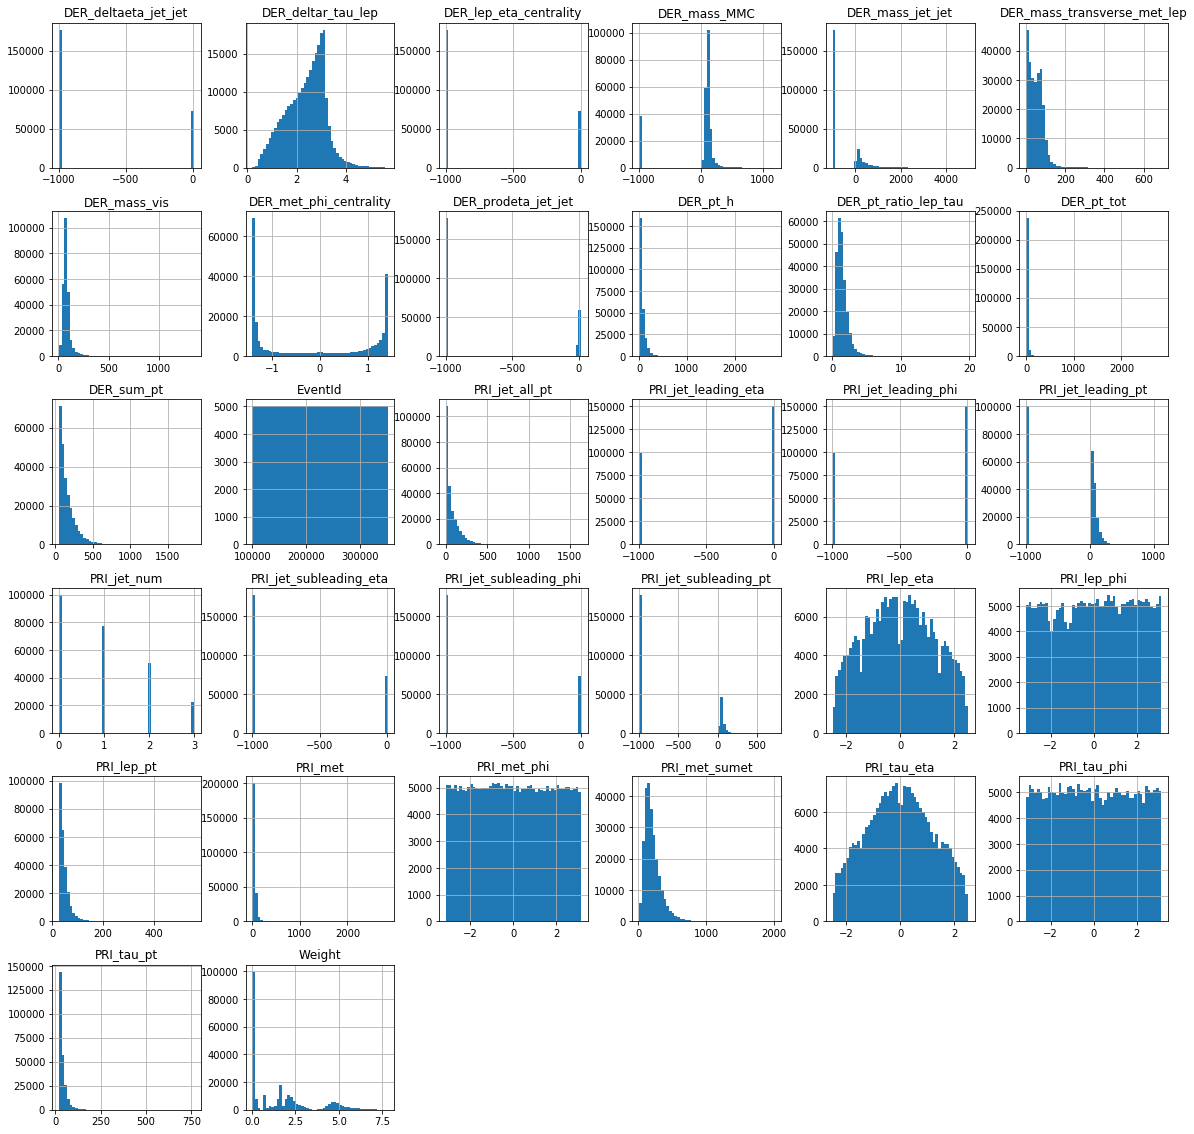

In [49]:
data.hist(bins=50,
            figsize=(20,20))

plt.show()


### Replace missing values

In [2]:
data = data.replace(-999, np.NaN)
# count the number of NaN values in each column
print(data.isnull().sum())
print("length total: ", len(data.DER_mass_vis))

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

### Drop features with 177457 missing values of total 250000 values

In [87]:
data = data.drop(columns=['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 
                          'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
                          'PRI_jet_subleading_phi'])

### Drop rows with NaN values

In [4]:
data.dropna(inplace=True)
# alternatively replace missing values:
#data.fillna(data.mean(), inplace=True)

# or use Imputer of sklearn:
# fill missing values with mean column values
#values = dataset.values
#imputer = Imputer()
#transformed_values = imputer.fit_transform(values)

print("length total: ", len(data.DER_mass_vis))
# count the number of NaN values in each column
print(data.isnull().sum())

length total:  138096
EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_all_pt                 0
Weight                         0
Label                          0
dtype: int64


In [5]:
# convert some categorial variables from type float to categorial so that they can be treated in the pipeline after
# TO DO: check in description in kaggle, if these variables are really categorial or only seem to be


data.PRI_jet_num = data.PRI_jet_num.astype('category')

#data.dtypes
data.PRI_jet_num.value_counts()

1    69982
2    47427
3    20687
Name: PRI_jet_num, dtype: int64

In [24]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,16.824,-0.277,258.733,2,67.435,2.150,0.444,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226,2.233584,b
5,100005,89.744,13.550,59.149,116.344,1.362,61.619,278.876,0.588,0.479,...,40.735,2.237,282.849,3,90.547,-2.412,-0.653,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,2.941,2.545,305.967,3.371,1.393,...,38.421,-1.443,294.074,2,123.010,0.864,1.450,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,2.897,1.526,138.178,0.365,-1.305,...,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,30.638,0.018636,s


In [25]:
# check if there are any NaN's in the data set
print(data.isnull().values.any())

False


In [6]:
# so that the python packages who are installed in miniconda3 are see
import sys
sys.path.append("/Users/adrianahne/miniconda3/envs/dataScienceEnv/lib/python3.5/site-packages")

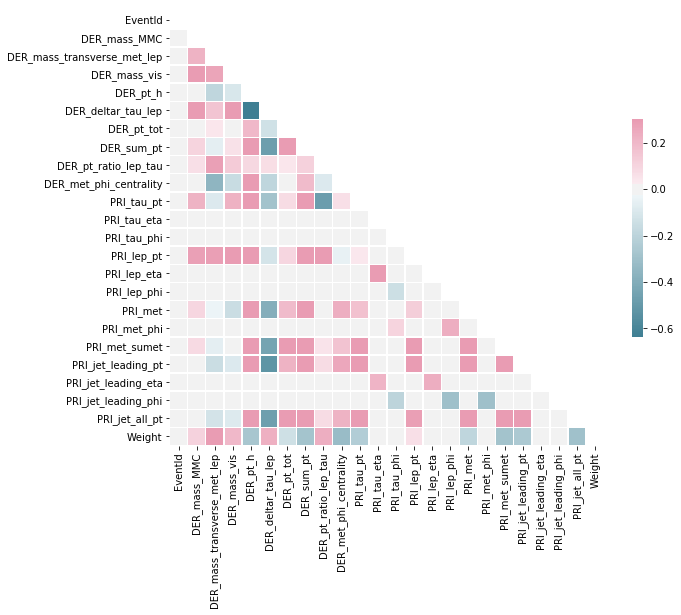

In [28]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn_pandas import DataFrameMapper, cross_val_score


    
class TypeSelector(BaseEstimator, TransformerMixin):
    """ Column selection after data type (boolean, numeric, categorical) """
    
    def __init__(self, dtype):
        self.dtype = dtype

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])
    


class StringIndexer(BaseEstimator, TransformerMixin):
    """ Simple Indexer as OneHotEncoder only accepts positive values"""
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.apply(lambda s: s.cat.codes.replace(
            {-1: len(s.cat.categories)}
        ))
    

# TO DO: add anova_filter to take only best columns
#anova_filter = SelectKBest(f_regression, k=10)
#trans = Transformer(['Weight', 'PRI_jet_all_pt', 'PRI_jet_subleading_phi',
#                     'PRI_jet_leading_phi', 'PRI_met', 
#                     'DER_deltar_tau_lep', 'DER_met_phi_centrality'])


#model = LogisticRegression(C=1e5)
model = LinearDiscriminantAnalysis()
#model = GaussianNB()

pipeline = Pipeline([

    #('pca', PCA(n_components=3)),
    #('select_best', SelectKBest(k=6)),

   ('features', FeatureUnion(n_jobs=1, transformer_list=[

        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
            #('debug_bool', Debug()),
        ])),  # booleans close

      ('numericals', Pipeline([
         ('selector', TypeSelector(np.number)),
           ('scaler', StandardScaler()),
          #('debug_bool', Debug()),

       ])),  # numericals close

       # # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
            #('debug_bool', Debug()),

        ]))  # categoricals close

 ])),  # features close


    ('model', model) # ML model
])




W = data.Weight.values
y = data.Label.replace(to_replace=['s','b'],value=[1,0])
X = data.drop(columns=['Label', 'EventId']) # data without the label column



## Grid search for logistic regression

In [83]:
#from sklearn.metrics import make_scorer

# Make a custom metric function
#def ams(s, b):
#    return math.sqrt(2 * ((s + b + 10) * math.log(1.0 + s/(b + 10)) - s))

#def get_ams_score(y_true, y_pred, weight):
#    s = weight * (y_true == 1) * (y_pred == 1)
#    b = weight * (y_true == 0) * (y_pred == 1)
#    s = np.sum(s)
#    b = np.sum(b)
#    return ams(s, b)

# Make a custom a scorer from the custom metric function
# Note: greater_is_better=False in make_scorer below would mean that the scoring function should be minimized.

#my_custom_scorer = make_scorer(get_ams_score, weight=W, greater_is_better=True)


X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    train_size=0.7,  
                                                    test_size=0.3) 

W = X_train.Weight.values
X_train.drop(columns='Weight')
X_test.drop(columns='Weight')
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("W.shape", W.shape)

# Options for logistic regression
param_grid = {
    'model__solver' : ['lsqr', 'svd'] # LDA
#    'model__solver' : ['newton-cg', 'lbfgs'], # logistic regression
}

#grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid, scoring=my_custom_scorer) # 3k-fold 
grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid, scoring='roc_auc') # 3k-fold 

#grid.fit(X_train, y_train, **{'model__sample_weight': W})
grid.fit(X_train, y_train)



# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


X_train.shape (96667, 24)
X_test.shape (41429, 24)
W.shape (96667,)


/Users/adrianahne/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/adrianahne/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/adrianahne/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Best: 0.951818 using {'model__solver': 'svd'}
0.951814 (0.000583) with: {'model__solver': 'lsqr'}
0.951818 (0.000566) with: {'model__solver': 'svd'}


/Users/adrianahne/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## without gridsearch logistic regression (not used anymore)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter



cv = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = []
confusion_mat = []

for train, test in cv.split(X,y):
    #import ipdb; ipdb.set_trace()
    
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]

    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print("y_pred", Counter(y_pred))
    print("y_test", Counter(y_test))

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    cm = 100 * cm / cm.sum(axis=1)[:, np.newaxis]
    confusion_mat.append(cm)
    print('Accuracy: {:.15f}% '.format(accuracy))


accuracies = np.asarray(accuracies) * 100
print('CV Accuracy: {:.10f}% +/- {:.2f}%'.format(accuracies.mean(), accuracies.std()))
print('Confusion matrix (mean):')

confusion_mat = np.asarray(confusion_mat)

print(np.mean(confusion_mat, axis=0))
#print('Confusion matrix:')
#print(cm)






X_train (124286, 24)
X_test (13810, 24)
y_train (124286,)
y_test (13810,)
y_pred Counter({0: 8023, 1: 5787})
y_test Counter({0: 7920, 1: 5890})
Accuracy: 0.992251991310644% 
X_train (124286, 24)
X_test (13810, 24)
y_train (124286,)
y_test (13810,)
y_pred Counter({0: 8020, 1: 5790})
y_test Counter({0: 7920, 1: 5890})
Accuracy: 0.992758870383780% 
X_train (124286, 24)
X_test (13810, 24)
y_train (124286,)
y_test (13810,)
y_pred Counter({0: 8014, 1: 5796})
y_test Counter({0: 7920, 1: 5890})
Accuracy: 0.993048515568429% 
X_train (124286, 24)
X_test (13810, 24)
y_train (124286,)
y_test (13810,)
y_pred Counter({0: 8007, 1: 5803})
y_test Counter({0: 7920, 1: 5890})
Accuracy: 0.993700217233888% 
X_train (124286, 24)
X_test (13810, 24)
y_train (124286,)
y_test (13810,)
y_pred Counter({0: 8008, 1: 5802})
y_test Counter({0: 7920, 1: 5890})
Accuracy: 0.993627805937726% 
X_train (124286, 24)
X_test (13810, 24)
y_train (124286,)
y_test (13810,)


KeyboardInterrupt: 

In [39]:
from tpot import TPOTClassifier 
from sklearn.model_selection import train_test_split



y = data.Label.replace(to_replace=['s','b'],value=[1,0]).values
X = data.drop(columns=['Label', 'EventId'])
X = X[['DER_deltar_tau_lep', 'DER_sum_pt', 'DER_mass_transverse_met_lep', 'PRI_jet_num']].values # data without the label column


X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    train_size=0.75,  
                                                    test_size=0.25)  
  
#my_tpot = TPOTClassifier(verbosity=2, max_time_mins=120, generations=10, periodic_checkpoint_folder="./best_models")  
#my_tpot.fit(X_train, y_train)  
  
#print(my_tpot.score(X_test, y_test))  


##  Keras model without grid-search

In [63]:
# Keras experiments
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import keras
from keras.wrappers.scikit_learn import KerasClassifier





def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=26, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



model = KerasClassifier(build_fn=create_model, nb_epoch=150, batch_size=5)


pipeline = Pipeline([

    #('pca', PCA(n_components=3)),
    #('select_best', SelectKBest(k=6)),

   ('features', FeatureUnion(n_jobs=1, transformer_list=[

        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
            #('debug_bool', Debug()),
        ])),  # booleans close

      ('numericals', Pipeline([
         ('selector', TypeSelector(np.number)),
           ('scaler', StandardScaler()),

       ])),  # numericals close

       # # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),

        ]))  # categoricals close

 ])),  # features close


    ('model', model) # ML model
])





cv = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = []
confusion_mat = []

for train, test in cv.split(X,y):
    #import ipdb; ipdb.set_trace()
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    W = data.Weight.values[train]

    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)


    #pipeline.fit(X_train, y_train)
    pipeline.fit(X_train, y_train, **{'model__sample_weight': W})
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    cm = 100 * cm / cm.sum(axis=1)[:, np.newaxis]
    confusion_mat.append(cm)
    print('Accuracy: {:.15f}% '.format(accuracy))


accuracies = np.asarray(accuracies) * 100
print('CV Accuracy: {:.10f}% +/- {:.2f}%'.format(accuracies.mean(), accuracies.std()))
print('Confusion matrix (mean):')

confusion_mat = np.asarray(confusion_mat)

print(np.mean(confusion_mat, axis=0))    


X_train (124286, 24)
X_test (13810, 24)
y_train (124286,)
y_test (13810,)
Epoch 1/1
 37820/124286 [========>.....................] - ETA: 31s - loss: 0.0143 - acc: 0.6892

KeyboardInterrupt: 

## Keras model with grid-search

In [62]:
# Keras experiments
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV




def create_model():
    model = Sequential()
    # always check the size of the input !!!!
    model.add(Dense(10, input_dim=26, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model



model = KerasClassifier(build_fn=create_model, nb_epoch=150, batch_size=5)


pipeline = Pipeline([

    #('pca', PCA(n_components=3)),
    #('select_best', SelectKBest(k=6)),

   ('features', FeatureUnion(n_jobs=1, transformer_list=[

        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
            #('debug_bool', Debug()),
        ])),  # booleans close

      ('numericals', Pipeline([
         ('selector', TypeSelector(np.number)),
           ('scaler', StandardScaler()),

       ])),  # numericals close

       # # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),

        ]))  # categoricals close

 ])),  # features close


    ('model', model) # ML model
])



X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    train_size=0.75,  
                                                    test_size=0.25) 

W = X_train.Weight.values
X_train.drop(columns='Weight')
X_test.drop(columns='Weight')
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("W.shape", W.shape)

param_grid = {
    'model__epochs':[4],
#    **{'model__sample_weight': W}
}

grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid) # 3k-fold 
grid.fit(X_train, y_train, **{'model__sample_weight': W})

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



X_train.shape (103572, 24)
X_test.shape (34524, 24)
W.shape (103572,)
Epoch 1/4
69048/69048 [==============================] - 26s 380us/step - loss: 0.0101 - acc: 0.7327
Epoch 2/4
69048/69048 [==============================] - 25s 356us/step - loss: 0.0015 - acc: 0.9523
Epoch 3/4
69048/69048 [==============================] - 24s 352us/step - loss: 9.9012e-04 - acc: 0.9741
Epoch 4/4
69048/69048 [==============================] - 11s 160us/step
Epoch 1/4
69048/69048 [==============================] - 23s 339us/step - loss: 0.0100 - acc: 0.7240
Epoch 2/4
69048/69048 [==============================] - 23s 329us/step - loss: 0.0014 - acc: 0.9538
Epoch 3/4
69048/69048 [==============================] - 23s 328us/step - loss: 9.2974e-04 - acc: 0.9753
Epoch 4/4
69048/69048 [==============================] - 10s 142us/step
Epoch 1/4
69048/69048 [==============================] - 1303s 19ms/step - loss: 0.0098 - acc: 0.7378
Epoch 2/4
69048/69048 [==============================] - 25s 358us/ste

KeyboardInterrupt: 

In [54]:
y_test.shape

(34524,)

In [4]:

data.values.shape


(250000, 33)